<a href="https://colab.research.google.com/github/Naitik582/oibsip_taskno-Level-2-Project-5/blob/main/Credit_Card_Autocomplete_%26_Autocorrect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
import pandas as pd

df = pd.read_csv('/content/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Dataset Info:")
print(df.info())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("\nDataset shape after cleaning:", df.shape)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

In [ ]:
import pandas as pd
import random
sentences = [
    "I love learning data science",
    "I love watching YouTube videos",
    "Data science is fun",
    "Data analytics is powerful",
    "Machine learning is a part of data science",
    "YouTube is a great platform",
    "Learning is a continuous process"
]

words = []
for sentence in sentences:
    for word in sentence.lower().split():
        words.append(word)

def autocomplete(prefix):
    suggestions = set([word for word in words if word.startswith(prefix.lower())])
    return list(suggestions) if suggestions else ["No suggestions"]

user_input = "da"
print("Suggestions for prefix '{}':".format(user_input))
print(autocomplete(user_input))

Suggestions for prefix 'da':
['data']


In [ ]:
import difflib

unique_words = list(set(words))

def autocorrect(word):
    suggestions = difflib.get_close_matches(word.lower(), unique_words, n=3, cutoff=0.6)
    return suggestions if suggestions else ["No correction found"]

misspelled_word = "dtaa"
print("Suggestions for '{}':".format(misspelled_word))
print(autocorrect(misspelled_word))

Suggestions for 'dtaa':
['data']


In [ ]:
autocomplete_tests = {
    "da": "data",
    "yo": "youtube",
    "le": "learning"
}

autocorrect_tests = {
    "dtaa": "data",
    "youtub": "youtube",
    "larn": "learning"
}

auto_correct = 0
for prefix, correct_word in autocomplete_tests.items():
    if correct_word in autocomplete(prefix):
        auto_correct += 1

autocomplete_accuracy = auto_correct / len(autocomplete_tests)
print("Autocomplete Accuracy:", round(autocomplete_accuracy * 100, 2), "%")

correction_correct = 0
for typo, correct_word in autocorrect_tests.items():
    if correct_word in autocorrect(typo):
        correction_correct += 1

autocorrect_accuracy = correction_correct / len(autocorrect_tests)
print("Autocorrect Accuracy:", round(autocorrect_accuracy * 100, 2), "%")

Autocomplete Accuracy: 100.0 %
Autocorrect Accuracy: 100.0 %


In [11]:
user_feedback = {
    "autocomplete": [5, 4, 5, 3, 4],
    "autocorrect": [5, 5, 4, 4, 5]
}

def avg_feedback(feedback_list):
    return round(sum(feedback_list) / len(feedback_list), 2)

auto_score = avg_feedback(user_feedback["autocomplete"])
correct_score = avg_feedback(user_feedback["autocorrect"])

print("Average User Feedback:")
print(f"Autocomplete Satisfaction: {auto_score}/5")
print(f"Autocorrect Satisfaction: {correct_score}/5")

Average User Feedback:
Autocomplete Satisfaction: 4.2/5
Autocorrect Satisfaction: 4.6/5


In [ ]:
vocab = ["data", "youtube", "learning", "model", "machine", "project", "input", "output"]

def jaccard_similarity(str1, str2):
    set1, set2 = set(str1), set(str2)
    return len(set1 & set2) / len(set1 | set2)

def autocorrect_jaccard(word, vocab):
    similarities = [(jaccard_similarity(word, v), v) for v in vocab]
    similarities.sort(reverse=True)
    return similarities[0][1]

def autocorrect(word):
    distances = [(edit_distance(word, v), v) for v in vocab]
    distances.sort()
    return distances[0][1]

def edit_distance(str1, str2):
    m, n = len(str1), len(str2)
    dp = [[0]*(n+1) for _ in range(m+1)]

    for i in range(m+1):
        for j in range(n+1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])

    return dp[m][n]

test_words = ["dtaa", "youtub", "larn"]
expected = ["data", "youtube", "learning"]

edit_distance_correct = 0
jaccard_correct = 0

for i in range(len(test_words)):
    ed_guess = autocorrect(test_words[i])
    jac_guess = autocorrect_jaccard(test_words[i], vocab)

    if ed_guess == expected[i]:
        edit_distance_correct += 1
    if jac_guess == expected[i]:
        jaccard_correct += 1

print("Model Accuracy Comparison:")
print(f"Edit Distance Correct: {edit_distance_correct}/{len(test_words)}")
print(f"Jaccard Similarity Correct: {jaccard_correct}/{len(test_words)}")

Model Accuracy Comparison:
Edit Distance Correct: 2/3
Jaccard Similarity Correct: 3/3


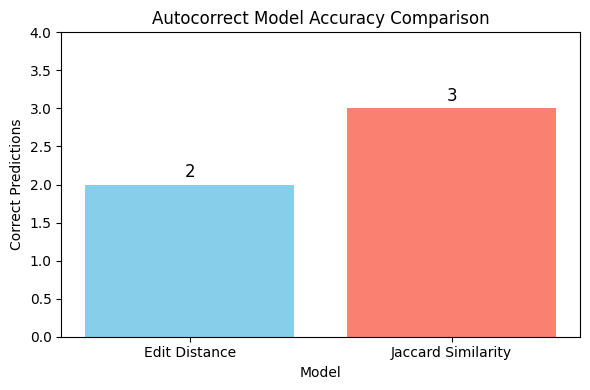

In [ ]:
import matplotlib.pyplot as plt

models = ['Edit Distance', 'Jaccard Similarity']
accuracies = [edit_distance_correct, jaccard_correct]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['skyblue', 'salmon'])
plt.title('Autocorrect Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Correct Predictions')
plt.ylim(0, len(test_words) + 1)

for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.1, str(accuracies[i]), ha='center', fontsize=12)

plt.tight_layout()
plt.show()